# Thai Named Entity Recognition Using Bi-LSTM + CRF
## The model use Bi-directional LSTM with Word / Character representation and CRF for sequece tagging

perform keras backend

- Word Embedding : v. 0.32 Thai2Fit 400 dimension
- Char Embedding : Bi-LSTM training from scratch 32 dimension

## Declare Path for Model and Dataset
Declare user path to load/save model and dataset
In this file include:
- raw path
- model path
- word embedding path
- dictionary path (char2index / ner2index)

In [1]:
DATA_PATH='./'
RAW_PATH = f'{DATA_PATH}raw/'
MODEL_PATH = f'{DATA_PATH}bilstm_crf/'
# MODEL_NAME = "last_weight-50.hdf5"
W_MODEL_PATH = f'{DATA_PATH}model/thai2fit/'
# TRAIN_PATH = f'{RAW_PATH}train.data'
# VALIDATION_PATH = f'{RAW_PATH}val.data'

In [2]:
# %run sem_role_bilstmcrf.py --train_data=$TRAIN_PATH --validation_data=$VALIDATION_PATH \
#         --model_path=$MODEL_PATH --model_name=$MODEL_NAME --w_model_path=$W_MODEL_PATH

In [3]:
runs = {f'f{i}':f'_cv{i}' for i in range(5)}
runs.update({'oov':'_oov', 'one':''})
runs_param = [(f'train{v}.data', f'val{v}.data', f'last_weight_{k}.hdf5') for k, v in runs.items()]

Using TensorFlow backend.


Tensorflow Version : 1.15.0
Keras Version : 2.2.4
TRAIN_PATH 		=  ./raw/train_cv0.data
VALIDATION_PATH 	=  ./raw/val_cv0.data
MODEL_PATH 		=  ./frame_model/
MODEL_NAME 		=  last_weight_f0.hdf5
Word_Embed__MODEL_PATH 	=  ./model/thai2fit/
Dict_MODEL_PATH 	=  ./frame_model//dictionary/
=========  Hyperparameters  =========
max_len 		=  250
max_len_char 		=  30 

character_LSTM_unit 	=  32
char_embedding_dim 	=  32
main_lstm_unit 		=  256
lstm_recurrent_dropout 	=  0.5 

train_batch_size 	=  32
train_epochs 		=  40
Train sentences =  1790
Test sentences  =  448
Sample sentence :  [('ทำให้', 'Verb'), ('เกิด', 'Verb'), ('โรค', 'Object'), ('รากเน่า', 'Object'), ('ได้', 'Z-O'), ('_', 'Z-O')]

Load Thai2Fit model completed ...

No. of unique words :  2236
No. of tags :  13
No. of known words :  55677
Semantic role tag :  {'Accompanyment': 0, 'Agent': 1, 'Benefactor': 2, 'Experiencer': 3, 'Instrument': 4, 'Location': 5, 'Manner': 6, 'Measure': 7, 'Object': 8, 'Time': 9, 'Verb': 10, 'Z-O': 11, '

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 250, 30)      0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 250)          0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 250, 30, 32)  12768       char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 250, 400)     22270800    word_input_[0][0]                
__________________________________________________________________________________________________
time_distr

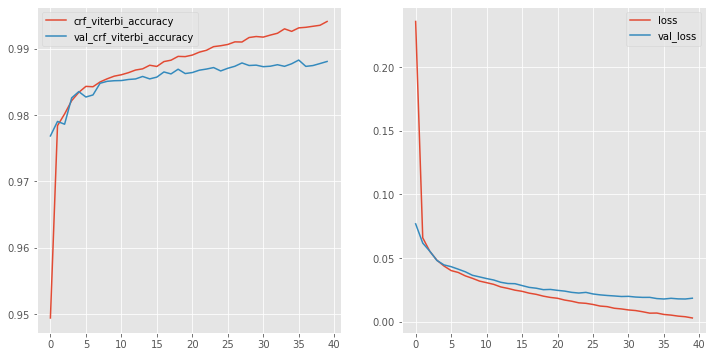


Save Trained Model Weights at ./frame_model/last_weight_f0.hdf5 ...


Prediction of validation data started ...
448/448 [==============================] - 5s 11ms/step
['Accompanyment', 'Agent', 'Benefactor', 'Experiencer', 'Instrument', 'Location', 'Manner', 'Measure', 'Object', 'Time', 'Verb', 'Z-O']
               precision    recall  f1-score   support

Accompanyment     0.7639    0.7237    0.7432        76
        Agent     0.5614    0.4211    0.4812       152
   Benefactor     0.5000    0.1111    0.1818         9
  Experiencer     0.4569    0.4569    0.4569       116
   Instrument     0.0000    0.0000    0.0000        16
     Location     0.6083    0.4650    0.5271       157
       Manner     0.9167    0.1294    0.2268        85
      Measure     0.6261    0.6102    0.6180       236
       Object     0.8063    0.6150    0.6978       961
         Time     0.6184    0.6144    0.6164       153
         Verb     0.7854    0.8373    0.8105       590
          Z-O     0.7032    0.8271

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train sentences =  1790
Test sentences  =  448
Sample sentence :  [('ทำให้', 'Verb'), ('เกิด', 'Verb'), ('รา', 'Object'), ('อื่น', 'Object'), ('ที่', 'Object'), ('ไม่', 'Object'), ('ต้องการ', 'Object'), ('จน', 'Z-O'), ('กระทบ', 'Z-O'), ('กับ', 'Object'), ('ผลผลิต', 'Object'), ('_', 'Z-O')]

Load Thai2Fit model completed ...

No. of unique words :  2277
No. of tags :  13
No. of known words :  55677
Semantic role tag :  {'Accompanyment': 0, 'Agent': 1, 'Benefactor': 2, 'Experiencer': 3, 'Instrument': 4, 'Location': 5, 'Manner': 6, 'Measure': 7, 'Object': 8, 'Time': 9, 'Verb': 10, 'Z-O': 11, 'pad': 12}
No. of unique characters :  399

Save Dictionary for Character and Semantic Role Tag completed ...

Prepare Training Dataset started ...
Prepare Training Dataset completed ...

Prepare Validation Dataset started ...
Prepare Validation Dataset completed ...



/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 250, 30)      0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 250)          0                                            
__________________________________________________________________________________________________
time_distributed_4 (TimeDistrib (None, 250, 30, 32)  12768       char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 250, 400)     22270800    word_input_[0][0]                
__________________________________________________________________________________________________
time_distr

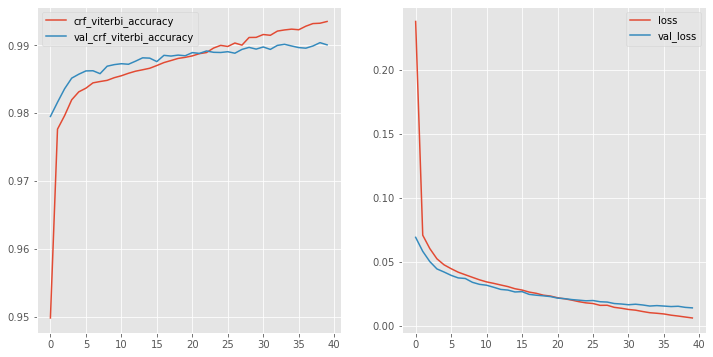


Save Trained Model Weights at ./frame_model/last_weight_f1.hdf5 ...


Prediction of validation data started ...
448/448 [==============================] - 4s 9ms/step
['Accompanyment', 'Agent', 'Benefactor', 'Experiencer', 'Instrument', 'Location', 'Manner', 'Measure', 'Object', 'Time', 'Verb', 'Z-O']
               precision    recall  f1-score   support

Accompanyment     0.7500    0.3191    0.4478        47
        Agent     0.5259    0.6040    0.5622       101
   Benefactor     0.0000    0.0000    0.0000         6
  Experiencer     0.6364    0.4628    0.5359       121
   Instrument     0.8000    0.3429    0.4800        35
     Location     0.6516    0.5316    0.5855       190
       Manner     0.5263    0.4286    0.4724        70
      Measure     0.6121    0.7163    0.6601       141
       Object     0.7166    0.7034    0.7100       816
         Time     0.6271    0.5481    0.5850       135
         Verb     0.8000    0.8388    0.8190       577
          Z-O     0.7566    0.7961 

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Load Thai2Fit model completed ...

No. of unique words :  2308
No. of tags :  13
No. of known words :  55677
Semantic role tag :  {'Accompanyment': 0, 'Agent': 1, 'Benefactor': 2, 'Experiencer': 3, 'Instrument': 4, 'Location': 5, 'Manner': 6, 'Measure': 7, 'Object': 8, 'Time': 9, 'Verb': 10, 'Z-O': 11, 'pad': 12}
No. of unique characters :  399

Save Dictionary for Character and Semantic Role Tag completed ...

Prepare Training Dataset started ...
Prepare Training Dataset completed ...

Prepare Validation Dataset started ...
Prepare Validation Dataset completed ...



/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 250, 30)      0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 250)          0                                            
__________________________________________________________________________________________________
time_distributed_7 (TimeDistrib (None, 250, 30, 32)  12768       char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 250, 400)     22270800    word_input_[0][0]                
__________________________________________________________________________________________________
time_distr

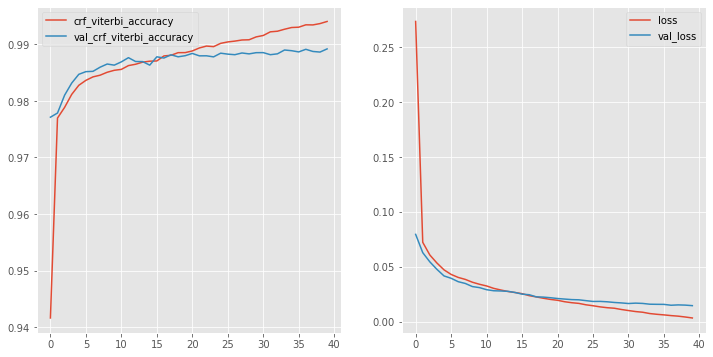


Save Trained Model Weights at ./frame_model/last_weight_f2.hdf5 ...


Prediction of validation data started ...
448/448 [==============================] - 4s 10ms/step
['Accompanyment', 'Agent', 'Benefactor', 'Experiencer', 'Instrument', 'Location', 'Manner', 'Measure', 'Object', 'Time', 'Verb', 'Z-O']
               precision    recall  f1-score   support

Accompanyment     0.6389    0.5227    0.5750        44
        Agent     0.5477    0.7586    0.6361       174
   Benefactor     1.0000    0.3333    0.5000         6
  Experiencer     0.5455    0.3125    0.3974        96
   Instrument     0.4839    0.3750    0.4225        40
     Location     0.5359    0.6599    0.5915       147
       Manner     0.4400    0.1803    0.2558        61
      Measure     0.7565    0.6266    0.6854       233
       Object     0.7925    0.6714    0.7270       916
         Time     0.6991    0.5809    0.6345       136
         Verb     0.7641    0.8353    0.7981       601
          Z-O     0.7415    0.7954

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Load Thai2Fit model completed ...

No. of unique words :  2251
No. of tags :  13
No. of known words :  55677
Semantic role tag :  {'Accompanyment': 0, 'Agent': 1, 'Benefactor': 2, 'Experiencer': 3, 'Instrument': 4, 'Location': 5, 'Manner': 6, 'Measure': 7, 'Object': 8, 'Time': 9, 'Verb': 10, 'Z-O': 11, 'pad': 12}
No. of unique characters :  399

Save Dictionary for Character and Semantic Role Tag completed ...

Prepare Training Dataset started ...
Prepare Training Dataset completed ...

Prepare Validation Dataset started ...
Prepare Validation Dataset completed ...



/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 250, 30)      0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 250)          0                                            
__________________________________________________________________________________________________
time_distributed_10 (TimeDistri (None, 250, 30, 32)  12768       char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 250, 400)     22270800    word_input_[0][0]                
__________________________________________________________________________________________________
time_distr

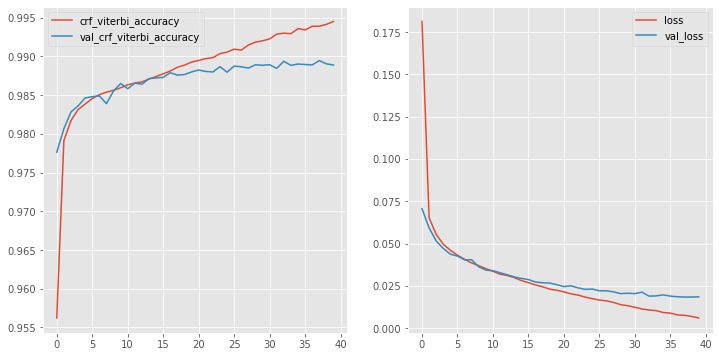


Save Trained Model Weights at ./frame_model/last_weight_f3.hdf5 ...


Prediction of validation data started ...
447/447 [==============================] - 5s 11ms/step
['Accompanyment', 'Agent', 'Benefactor', 'Experiencer', 'Instrument', 'Location', 'Manner', 'Measure', 'Object', 'Time', 'Verb', 'Z-O']
               precision    recall  f1-score   support

Accompanyment     0.3333    0.2500    0.2857        24
        Agent     0.4553    0.6772    0.5445       158
   Benefactor     0.3333    0.1111    0.1667         9
  Experiencer     0.6026    0.3588    0.4498       131
   Instrument     0.5000    0.8077    0.6176        26
     Location     0.6763    0.4123    0.5123       228
       Manner     0.5357    0.2459    0.3371        61
      Measure     0.5930    0.7688    0.6696       199
       Object     0.6753    0.7246    0.6990       904
         Time     0.6771    0.4392    0.5328       148
         Verb     0.7843    0.8850    0.8316       600
          Z-O     0.7892    0.7662

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Load Thai2Fit model completed ...

No. of unique words :  2243
No. of tags :  13
No. of known words :  55677
Semantic role tag :  {'Accompanyment': 0, 'Agent': 1, 'Benefactor': 2, 'Experiencer': 3, 'Instrument': 4, 'Location': 5, 'Manner': 6, 'Measure': 7, 'Object': 8, 'Time': 9, 'Verb': 10, 'Z-O': 11, 'pad': 12}
No. of unique characters :  399

Save Dictionary for Character and Semantic Role Tag completed ...

Prepare Training Dataset started ...
Prepare Training Dataset completed ...

Prepare Validation Dataset started ...
Prepare Validation Dataset completed ...



/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 250, 30)      0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 250)          0                                            
__________________________________________________________________________________________________
time_distributed_13 (TimeDistri (None, 250, 30, 32)  12768       char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 250, 400)     22270800    word_input_[0][0]                
__________________________________________________________________________________________________
time_distr

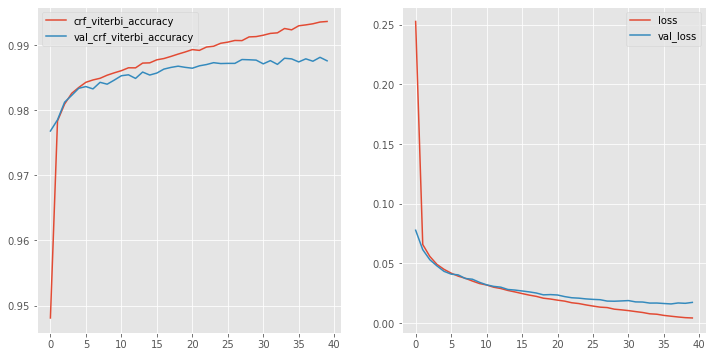


Save Trained Model Weights at ./frame_model/last_weight_f4.hdf5 ...


Prediction of validation data started ...
447/447 [==============================] - 5s 11ms/step
['Accompanyment', 'Agent', 'Benefactor', 'Experiencer', 'Instrument', 'Location', 'Manner', 'Measure', 'Object', 'Time', 'Verb', 'Z-O']
               precision    recall  f1-score   support

Accompanyment     0.6667    0.9474    0.7826        57
        Agent     0.5915    0.7185    0.6488       135
   Benefactor     1.0000    0.5000    0.6667         2
  Experiencer     0.6500    0.3636    0.4664       143
   Instrument     0.3750    0.2727    0.3158        22
     Location     0.7262    0.2798    0.4040       218
       Manner     0.4375    0.1167    0.1842        60
      Measure     0.7194    0.8547    0.7812       234
       Object     0.5470    0.8291    0.6591       913
         Time     0.7320    0.7619    0.7467       147
         Verb     0.8233    0.7692    0.7954       624
          Z-O     0.7850    0.6750

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Load Thai2Fit model completed ...

No. of unique words :  2242
No. of tags :  13
No. of known words :  55677
Semantic role tag :  {'Accompanyment': 0, 'Agent': 1, 'Benefactor': 2, 'Experiencer': 3, 'Instrument': 4, 'Location': 5, 'Manner': 6, 'Measure': 7, 'Object': 8, 'Time': 9, 'Verb': 10, 'Z-O': 11, 'pad': 12}
No. of unique characters :  399

Save Dictionary for Character and Semantic Role Tag completed ...

Prepare Training Dataset started ...
Prepare Training Dataset completed ...

Prepare Validation Dataset started ...
Prepare Validation Dataset completed ...



/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 250, 30)      0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 250)          0                                            
__________________________________________________________________________________________________
time_distributed_16 (TimeDistri (None, 250, 30, 32)  12768       char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 250, 400)     22270800    word_input_[0][0]                
__________________________________________________________________________________________________
time_distr

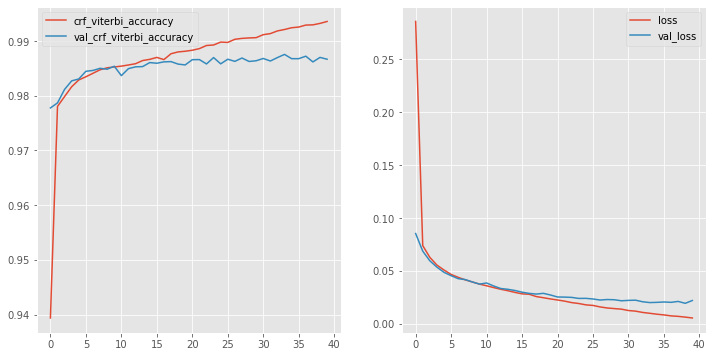


Save Trained Model Weights at ./frame_model/last_weight_oov.hdf5 ...


Prediction of validation data started ...
431/431 [==============================] - 5s 12ms/step
Prediction of validation data completed ...

['Accompanyment', 'Agent', 'Benefactor', 'Experiencer', 'Instrument', 'Location', 'Manner', 'Measure', 'Object', 'Time', 'Verb', 'Z-O']
               precision    recall  f1-score   support

Accompanyment     0.7579    0.9351    0.8372        77
        Agent     0.6154    0.3540    0.4494       113
   Benefactor     0.0000    0.0000    0.0000         8
  Experiencer     0.4143    0.3867    0.4000        75
   Instrument     1.0000    0.2857    0.4444        21
     Location     0.7658    0.3712    0.5000       229
       Manner     0.0000    0.0000    0.0000       102
      Measure     0.5342    0.4815    0.5065       162
       Object     0.8050    0.5299    0.6391       904
         Time     0.6544    0.6899    0.6717       129
         Verb     0.7815    0.5782    0.664

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Load Thai2Fit model completed ...

No. of unique words :  2236
No. of tags :  13
No. of known words :  55677
Semantic role tag :  {'Accompanyment': 0, 'Agent': 1, 'Benefactor': 2, 'Experiencer': 3, 'Instrument': 4, 'Location': 5, 'Manner': 6, 'Measure': 7, 'Object': 8, 'Time': 9, 'Verb': 10, 'Z-O': 11, 'pad': 12}
No. of unique characters :  399

Save Dictionary for Character and Semantic Role Tag completed ...

Prepare Training Dataset started ...
Prepare Training Dataset completed ...

Prepare Validation Dataset started ...
Prepare Validation Dataset completed ...



/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 250, 30)      0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 250)          0                                            
__________________________________________________________________________________________________
time_distributed_19 (TimeDistri (None, 250, 30, 32)  12768       char_input[0][0]                 
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 250, 400)     22270800    word_input_[0][0]                
__________________________________________________________________________________________________
time_distr

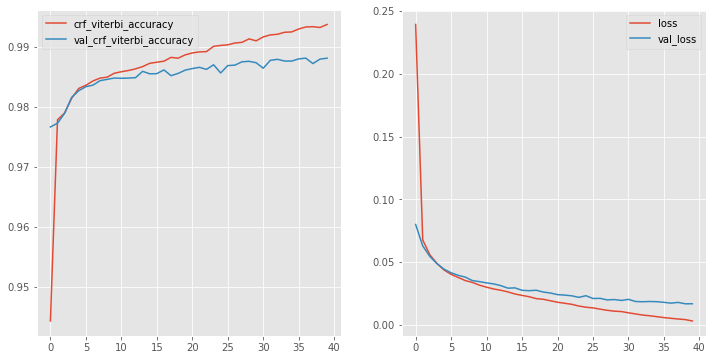


Save Trained Model Weights at ./frame_model/last_weight_one.hdf5 ...


Prediction of validation data started ...
448/448 [==============================] - 6s 12ms/step
Prediction of validation data completed ...

['Accompanyment', 'Agent', 'Benefactor', 'Experiencer', 'Instrument', 'Location', 'Manner', 'Measure', 'Object', 'Time', 'Verb', 'Z-O']
               precision    recall  f1-score   support

Accompanyment     0.7534    0.7237    0.7383        76
        Agent     0.5584    0.2829    0.3755       152
   Benefactor     0.0000    0.0000    0.0000         9
  Experiencer     0.5275    0.4138    0.4638       116
   Instrument     0.4000    0.1250    0.1905        16
     Location     0.4903    0.6433    0.5565       157
       Manner     0.8947    0.2000    0.3269        85
      Measure     0.6141    0.4788    0.5381       236
       Object     0.7059    0.7419    0.7235       961
         Time     0.6294    0.6993    0.6625       153
         Verb     0.8208    0.8153    0.818

/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yoyo/anaconda3/envs/tf1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
for train_name, val_name, model_name in runs_param:
    TRAIN_PATH = f'{RAW_PATH}{train_name}'
    VALIDATION_PATH = f'{RAW_PATH}{val_name}'
    MODEL_NAME = model_name
    %run sem_role_bilstmcrf.py --train_data=$TRAIN_PATH --validation_data=$VALIDATION_PATH \
            --model_path=$MODEL_PATH --model_name=$MODEL_NAME --w_model_path=$W_MODEL_PATH

In [5]:
# !python sem_role_bilstmcrf.py --train_data=$TRAIN_PATH --validation_data=$VALIDATION_PATH \
#         --model_path=$MODEL_PATH --model_name=$MODEL_NAME --w_model_path=$W_MODEL_PATH